# Analyse des données du CPF
Dans cette analyse, 2 graphiques sont produits:
- Un Area Chart montrant le pourcentage investit par acteur à mesure que la part d'investitssement de France Compétences diminue
- Un Bubble Line Chart qui montre la variation du taux d'échec en fonction du pourcentage d'investissement de chaque acteur

### Etude préliminaire du DF et nettoyage

In [1]:
#Importation des librairies

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)

In [2]:
#Importation du Data Frame
df_cpf = pd.read_csv("data/data.csv", sep=";")

In [3]:
df_cpf.shape

(839998, 43)

In [4]:
df_cpf["statut_dossier"].value_counts()

statut_dossier
Clos - Réalisation Totale              474918
Clos - Non Réalisé annulé titulaire     88493
Entrée en formation                     85882
Clos - Non Réalisé annulé OF            75574
Clos - Réalisation Partielle            58391
Validé                                  43321
Sortie de formation                     13170
Dossier annulé gestionnaire               249
Name: count, dtype: int64

In [5]:
#Nettoyage du Data Frame
df_cpf['r.part'] = df_cpf['statut_dossier'].apply(lambda x: 0 if (x == "Clos - Réalisation Totale") | (x == "validé") else (1 if x == "Clos - Réalisation Partielle" else np.NaN))
df_cpf['r.tot'] = df_cpf['statut_dossier'].apply(lambda x: 1 if (x == "Clos - Réalisation Totale") | (x == "validé") else (0 if x == "Clos - Réalisation Partielle" else np.NaN))
df_cpf_filtered = df_cpf[~(df_cpf['r.part'].isna() | df_cpf['r.tot'].isna())]

In [6]:
df_cpf_filtered.shape

(533309, 45)

### Lien de dépendance entre échec et taux de participation financiaire 

#### Data Wrangling

In [7]:
import warnings

# Suppress FutureWarning from Seaborn
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

In [8]:
#Importation du DataFrame
df_cpf_filtered = df_cpf_filtered.rename(columns={"r.tot" : "r_tot", "r.part" : "r_part"})

In [9]:
#Calcul pour chaque session du pourcentage de financement par financeur
df_cpf_filtered["pourcentage_fin_fc"] =  (df_cpf_filtered['part_france_competences'] / df_cpf_filtered["montant_engage"])*100
df_cpf_filtered["pourcentage_fin_etat"] =  (df_cpf_filtered['part_etat'] / df_cpf_filtered["montant_engage"])*100
df_cpf_filtered["pourcentage_fin_pe"] =  (df_cpf_filtered['part_pole_emploi'] / df_cpf_filtered["montant_engage"])*100
df_cpf_filtered["pourcentage_fin_region"] =  (df_cpf_filtered['part_region'] / df_cpf_filtered["montant_engage"])*100
df_cpf_filtered["pourcentage_fin_opco"] =  (df_cpf_filtered['part_opco'] / df_cpf_filtered["montant_engage"])*100
df_cpf_filtered["pourcentage_fin_ets"] =  (df_cpf_filtered['part_entreprise'] / df_cpf_filtered["montant_engage"])*100
df_cpf_filtered["pourcentage_fin_cec"] =  (df_cpf_filtered['part_cec'] / df_cpf_filtered["montant_engage"])*100
df_cpf_filtered["pourcentage_fin_tit"] =  (df_cpf_filtered['part_titulaire'] / df_cpf_filtered["montant_engage"])*100

In [10]:
#Suppression des 3 lignes où France Compétence finance plus de 100% du montant de la formation
i = df_cpf_filtered[(df_cpf_filtered["pourcentage_fin_fc"]>100)].index
df_cpf_filtered = df_cpf_filtered.drop(i)
df_cpf_filtered.shape

(533306, 53)

In [11]:
#fonction de classification des pourcentages en catégories
def get_cat_percentage(value):
    if (value > 0) and (value <= 25):
        return "0%* à 25%"
    elif (value > 25) and (value <= 50):
        return "25%* à 50%"
    elif (value > 50) and (value <= 75):
        return "50%* à 75%"
    elif (value > 75):
        return "75%* à 100%"
    else:
        return "0%"

De nouvelles colonnes de catégories de pourcentage par financeur par session ("cat_pourcentage_fc", "cat_pourcentage_etat", etc.) ont été générées en appliquant la fonction de classification des pourcentages préalablement définie.

In [12]:
# On applique la fonction
df_cpf_filtered["cat_pourcentage_fc"] = df_cpf_filtered["pourcentage_fin_fc"].apply(get_cat_percentage)
df_cpf_filtered["cat_pourcentage_etat"] = df_cpf_filtered["pourcentage_fin_etat"].apply(get_cat_percentage)
df_cpf_filtered["cat_pourcentage_pe"] = df_cpf_filtered["pourcentage_fin_pe"].apply(get_cat_percentage)
df_cpf_filtered["cat_pourcentage_region"] = df_cpf_filtered["pourcentage_fin_region"].apply(get_cat_percentage)
df_cpf_filtered["cat_pourcentage_opco"] = df_cpf_filtered["pourcentage_fin_opco"].apply(get_cat_percentage)
df_cpf_filtered["cat_pourcentage_ets"] = df_cpf_filtered["pourcentage_fin_ets"].apply(get_cat_percentage)
df_cpf_filtered["cat_pourcentage_cec"] = df_cpf_filtered["pourcentage_fin_cec"].apply(get_cat_percentage)
df_cpf_filtered["cat_pourcentage_tit"] = df_cpf_filtered["pourcentage_fin_tit"].apply(get_cat_percentage)

In [13]:
df_cpf_filtered.head(10)

,date_chargement,date validation,statut_dossier,type_referentiel,type_formation2,code_rs,code_rncp,domaine_formation_nsf,formacode_principal,libelle_formacode_principal,modalite_presence,region_lieu_formation,departement_lieu_formation,nb_dossiers,nb_titulaires,prix_moyen,nb_dossiers_a_duree_connue,duree_moyenne,montant_engage,part_france_competences,nb_dossiers_finances_par_titulaires,part_titulaire,nb_dossiers_finances_par_etat,part_etat,nb_dossiers_finances_par_pole_emploi,part_pole_emploi,nb_dossiers_finances_par_regions,part_region,nb_dossiers_finances_par_opco,part_opco,nb_dossiers_finances_par_entreprises,part_entreprise,nb_dossiers_finances_par_cec,part_cec,Code Officiel Département,Code Officiel Région,Nom Officiel Département Majuscule,année de validation,code_certifinfo,intitule_certification,code_region_lieu_formation,code_postal_lieu_formation,Mois de validation,r_part,r_tot,pourcentage_fin_fc,pourcentage_fin_etat,pourcentage_fin_pe,pourcentage_fin_region,pourcentage_fin_opco,pourcentage_fin_ets,pourcentage_fin_cec,pourcentage_fin_tit,cat_pourcentage_fc,cat_pourcentage_etat,cat_pourcentage_pe,cat_pourcentage_region,cat_pourcentage_opco,cat_pourcentage_ets,cat_pourcentage_cec,cat_pourcentage_tit
69,2024-01-31,2023-03,Clos - Réalisation Totale,RS,NaN,5656,-1,"Productions végétales, cultures spécialisées e...",21006.0,Protection phytosanitaire,En présentiel,Nouvelle-Aquitaine,Lot-et-Garonne,2,2,280,2,14.0,560,280,0,0,0,0,0,0,0,0,0,0,0,0,0,0,47,75.0,LOT ET GARONNE,2023,92173.0,\Certificat individuel Produits phytopharmaceu...,75,47110,3,0.0,1.0,50.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,25%* à 50%,0%,0%,0%,0%,0%,0%,0%
70,2024-01-31,2023-03,Clos - Réalisation Totale,RS,NaN,5800,-1,"Enseignement, formation",NaN,Français langue étrangère|Français mise à nive...,En présentiel,Île-de-France,Seine-Saint-Denis,1,1,1350,1,14.0,1350,1350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,93,11.0,SEINE SAINT DENIS,2023,89181.0,Certification en langue française Le Robert,11,93000,3,0.0,1.0,100.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,75%* à 100%,0%,0%,0%,0%,0%,0%,0%
71,2024-01-31,2023-03,Clos - Réalisation Totale,RS,NaN,5199,-1,"Enseignement, formation",NaN,Mise à niveau|Expression écrite,Mixte,Île-de-France,Hauts-de-Seine,2,2,1325,2,35.0,2650,2650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,92,11.0,HAUTS DE SEINE,2023,84714.0,Certificat Voltaire,11,92200,3,0.0,1.0,100.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,75%* à 100%,0%,0%,0%,0%,0%,0%,0%
72,2024-01-31,2023-03,Clos - Réalisation Totale,RS,NaN,5858,-1,"Transports, manutention, magasinage",NaN,Sécurité transport|Transport maritime,A distance,NC,NC,1,1,250,1,10.0,250,250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2023,84437.0,Certificat de formation spécifique à la sûreté...,NC,NC,3,0.0,1.0,100.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,75%* à 100%,0%,0%,0%,0%,0%,0%,0%
73,2024-01-31,2023-03,Clos - Réalisation Totale,RS,NaN,5924,-1,"Transports, manutention, magasinage",NaN,Personnel paramédical|Transport maritime,En présentiel,Martinique,Martinique,3,3,450,3,18.0,1350,1350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,972,2.0,MARTINIQUE,2023,84399.0,Certificat d'enseignement médical de niveau II...,02,97220,3,0.0,1.0,100.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,75%* à 100%,0%,0%,0%,0%,0%,0%,0%
74,2024-01-31,2023-03,Clos - Réalisation Totale,RS,NaN,5854,-1,"Transports, manutention, magasinage",31827.0,Transport marchandise,En présentiel,Pays de la Loire,Loire-Atlantique,1,1,1493,1,105.0,1493,516,0,0,0,0,1,977,0,0,0,0,0,0,0,0,44,52.0,LOIRE ATLANTIQUE,2023,76874.0,Attestation de capacité professionnelle en tra...,52,44980,3,0.0,1.0,34.561286,0.0,65.438714,0.0,0.000000,0.000000,0.000000,0.000000,25%* à 50%,0%,50%* à 75%,0%,0%,0%,0%,0%
75,2024-01-31,2023-03,Clos - Réalisation Totale,RS,NaN,5854,-1,"Transports, manutention, magasinage",31827.0,Transport marchandise,En présentiel,Île-de-France,Val-de-Marne,3,3,1267,3,105.0,3800,3800,0,0,0,0,0,0,0,0,0,0,

In [14]:
df_cpf_filtered.loc[df_cpf_filtered["pourcentage_fin_fc"] == 100, "france_competences_fin100"] = 1
df_cpf_filtered.loc[df_cpf_filtered["pourcentage_fin_fc"] < 100, "france_competences_fin100"] = 0
df_cpf_filtered.head()

,date_chargement,date validation,statut_dossier,type_referentiel,type_formation2,code_rs,code_rncp,domaine_formation_nsf,formacode_principal,libelle_formacode_principal,modalite_presence,region_lieu_formation,departement_lieu_formation,nb_dossiers,nb_titulaires,prix_moyen,nb_dossiers_a_duree_connue,duree_moyenne,montant_engage,part_france_competences,nb_dossiers_finances_par_titulaires,part_titulaire,nb_dossiers_finances_par_etat,part_etat,nb_dossiers_finances_par_pole_emploi,part_pole_emploi,nb_dossiers_finances_par_regions,part_region,nb_dossiers_finances_par_opco,part_opco,nb_dossiers_finances_par_entreprises,part_entreprise,nb_dossiers_finances_par_cec,part_cec,Code Officiel Département,Code Officiel Région,Nom Officiel Département Majuscule,année de validation,code_certifinfo,intitule_certification,code_region_lieu_formation,code_postal_lieu_formation,Mois de validation,r_part,r_tot,pourcentage_fin_fc,pourcentage_fin_etat,pourcentage_fin_pe,pourcentage_fin_region,pourcentage_fin_opco,pourcentage_fin_ets,pourcentage_fin_cec,pourcentage_fin_tit,cat_pourcentage_fc,cat_pourcentage_etat,cat_pourcentage_pe,cat_pourcentage_region,cat_pourcentage_opco,cat_pourcentage_ets,cat_pourcentage_cec,cat_pourcentage_tit,france_competences_fin100
69,2024-01-31,2023-03,Clos - Réalisation Totale,RS,NaN,5656,-1,"Productions végétales, cultures spécialisées e...",21006.0,Protection phytosanitaire,En présentiel,Nouvelle-Aquitaine,Lot-et-Garonne,2,2,280,2,14.0,560,280,0,0,0,0,0,0,0,0,0,0,0,0,0,0,47,75.0,LOT ET GARONNE,2023,92173.0,\Certificat individuel Produits phytopharmaceu...,75,47110,3,0.0,1.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25%* à 50%,0%,0%,0%,0%,0%,0%,0%,0.0
70,2024-01-31,2023-03,Clos - Réalisation Totale,RS,NaN,5800,-1,"Enseignement, formation",NaN,Français langue étrangère|Français mise à nive...,En présentiel,Île-de-France,Seine-Saint-Denis,1,1,1350,1,14.0,1350,1350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,93,11.0,SEINE SAINT DENIS,2023,89181.0,Certification en langue française Le Robert,11,93000,3,0.0,1.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75%* à 100%,0%,0%,0%,0%,0%,0%,0%,1.0
71,2024-01-31,2023-03,Clos - Réalisation Totale,RS,NaN,5199,-1,"Enseignement, formation",NaN,Mise à niveau|Expression écrite,Mixte,Île-de-France,Hauts-de-Seine,2,2,1325,2,35.0,2650,2650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,92,11.0,HAUTS DE SEINE,2023,84714.0,Certificat Voltaire,11,92200,3,0.0,1.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75%* à 100%,0%,0%,0%,0%,0%,0%,0%,1.0
72,2024-01-31,2023-03,Clos - Réalisation Totale,RS,NaN,5858,-1,"Transports, manutention, magasinage",NaN,Sécurité transport|Transport maritime,A distance,NC,NC,1,1,250,1,10.0,250,250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2023,84437.0,Certificat de formation spécifique à la sûreté...,NC,NC,3,0.0,1.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75%* à 100%,0%,0%,0%,0%,0%,0%,0%,1.0
73,2024-01-31,2023-03,Clos - Réalisation Totale,RS,NaN,5924,-1,"Transports, manutention, magasinage",NaN,Personnel paramédical|Transport maritime,En présentiel,Martinique,Martinique,3,3,450,3,18.0,1350,1350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,972,2.0,MARTINIQUE,2023,84399.0,Certificat d'enseignement médical de niveau II...,02,97220,3,0.0,1.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75%* à 100%,0%,0%,0%,0%,0%,0%,0%,1.0


##### Etude Secondaire du DF

Pourcentage des sessions financées à 100% par FC

In [15]:
df_cpf_filtered["france_competences_fin100"].mean()

0.6658353740629207

Nombre de titulaires

In [16]:
df_cpf_filtered["nb_titulaires"].sum()

3302033

Nombre de sessions financées à 100% par FC

In [17]:
fin_eq_100 = len(df_cpf_filtered[df_cpf_filtered["pourcentage_fin_fc"]==100])
fin_eq_100

355094

Nombre de sessions financées à 100% par d'autres acteurs

In [18]:
columns_to_check = ["pourcentage_fin_fc", "pourcentage_fin_etat", "pourcentage_fin_pe", "pourcentage_fin_region", "pourcentage_fin_opco", "pourcentage_fin_ets", "pourcentage_fin_cec", "pourcentage_fin_tit"]

fin_mixed = df_cpf_filtered[((df_cpf_filtered[columns_to_check] == 100).any(axis=1)) & (df_cpf_filtered["pourcentage_fin_fc"] < 100)]
len(fin_mixed)

811

Nombre de sessions avec un financement mix

In [19]:
fin_mixed = len(df_cpf_filtered[(df_cpf_filtered[columns_to_check] < 100).all(axis=1)])
fin_mixed

177401

Nombre de sessions financées à plus de 80% par FC mais pas à 100%

In [20]:
fin_sup_80 = len(df_cpf_filtered[(df_cpf_filtered["pourcentage_fin_fc"]>= 80) & (df_cpf_filtered["pourcentage_fin_fc"]<100)])
fin_sup_80

111624

Pourcentage de sessions mixes financées à plus de 80% par France Compétences

In [21]:
pourcentage = (fin_sup_80/fin_mixed)*100
pourcentage

62.92185500645431

Nombre de sessions non financées par FC

In [22]:
len(df_cpf_filtered[df_cpf_filtered["pourcentage_fin_fc"]==0])

6291

Pourcentage de sessions qui ne sont pas financées par FC

In [42]:
(811/533306)*100

0.15207029360254715

In [24]:
#export en csv du df
df_cpf_filtered[["pourcentage_fin_fc", "pourcentage_fin_etat", "pourcentage_fin_pe", "pourcentage_fin_region", "pourcentage_fin_opco", "pourcentage_fin_ets", "pourcentage_fin_cec", "pourcentage_fin_tit"]].to_csv("data/act_cpf.csv")

##### Génération du DF que nous allons plot

Description du DF:
- colonnes  : Financeurs
- index : Catégorie de Pourcentage
- valeurs : Pourcentage de Réussite

Par la suite, pour chaque financeur, un cté créé, présentant pour chaque catégorie de pourcentage du montant investi la moyenne des échecs. La moyenne des échecs correspond à la proportion d'échecs, étant donné que la variable d'échec dans le dataframe initial (“r_part”) est une variable binaire. Le nombre de sessions associées à chaque catégorie de montant de financement a également été inclus pour une interprétation plus approfondie de la signification des résultats. Les dataframes créés pour chaque financeur ont ensuite été fusionnés à l'aide de la bibliothèque pandas pour former notre dataframe intermédiaire.

In [25]:
#Création liste de catégories de pourcentages
cat_pourcentages = ["cat_pourcentage_fc","cat_pourcentage_tit", "cat_pourcentage_etat","cat_pourcentage_pe","cat_pourcentage_ets", "cat_pourcentage_region",
                   "cat_pourcentage_opco","cat_pourcentage_cec"]

#Ensuite créos une fonction créant un df pour une cat de pourcentage
#Ici le count représente l'ensemble des titulaires et non pas l'ensemble des sessions
def get_success_prop(cat_pct):
    column_suffix = "cat_pourcentage_"
    cat_name = cat_pct[len(column_suffix):]
    df = df_cpf_filtered.groupby(cat_pct)["r_part"].agg(propotion="mean")
    df["count"] = df_cpf_filtered.groupby(cat_pct)["nb_titulaires"].sum()
    df = df.rename(columns={"propotion": cat_name, "count" : cat_name + "_count"})
    df = df.rename_axis("index", inplace=False)
    return df

#Liste de compréhension avec les différents df générés par la fonction

liste_df = [get_success_prop(categorie) for categorie in cat_pourcentages]

#Passons à merge

final_result_df = liste_df[0].merge(liste_df[1], on="index", how="inner") \
                .merge(liste_df[2], on="index", how="inner") \
                .merge(liste_df[3], on="index", how="inner") \
                .merge(liste_df[4], on="index", how="inner") \
                .merge(liste_df[5], on="index", how="inner") \
                .merge(liste_df[6], on="index", how="inner") \
                .merge(liste_df[7], on="index", how="inner") 
                

final_result_df

,fc,fc_count,tit,tit_count,etat,etat_count,pe,pe_count,ets,ets_count,region,region_count,opco,opco_count,cec,cec_count
index,,,,,,,,,,,,,,,,
0%,0.045780,19134,0.114374,1026440,0.109478,3300487,0.108919,2192816,0.109778,2269848,0.108694,2922285,0.109548,2842293,0.110003,2006163
0%* à 25%,0.232643,9869,0.085121,2236269,0.173333,1508,0.072934,1065128,0.069921,1024318,0.128755,370816,0.076752,459211,0.086349,1295315
25%* à 50%,0.169709,28697,0.131278,30914,0.333333,16,0.119495,28488,0.125240,5089,0.206583,4779,0.207071,399,0.121212,437
50%* à 75%,0.123266,82131,0.172852,6632,0.000000,15,0.179265,10323,0.179756,1961,0.259211,2960,0.140351,88,0.144928,69
75%* à 100%,0.105650,3162202,0.173887,1778,0.000000,7,0.240956,5278,0.156006,817,0.406400,1193,0.285714,42,0.021277,49


In [26]:
# Changer la forme du DF d'un format Wide à un format Long plus simple pour la visualisation

# Filter columns to include only those containing 'count'
cols_with_count = [col for col in final_result_df.columns if 'count' in col]

# Filter columns to exclude those containing 'count'
cols_to_melt = [col for col in final_result_df.columns if 'count' not in col]

# Reset index to move 'index' from the index to a regular column
final_result_df_reset = final_result_df.reset_index()

# Melt the DataFrame using only the selected columns (excluding 'count')
melted_df = pd.melt(final_result_df_reset, id_vars='index', value_vars=cols_to_melt, var_name='variable', value_name='pourcentage')

# Melt the 'count' columns separately
melted_count_df = pd.melt(final_result_df_reset, id_vars='index', value_vars=cols_with_count, var_name='variable', value_name='count')
melted_count_df = melted_count_df.rename_axis("id", inplace=False)
melted_df = melted_df.rename_axis("id", inplace=False)
# Merge the two melted DataFrames on 'index' and 'variable'
result_melted_df = melted_df.merge(melted_count_df["count"], on="id")

#result_melted_df["col"] = [0] * 10 + [1] * 10 + [2] * 10 + [3] * 10
final_melted_df = result_melted_df[result_melted_df["variable"].isin(["fc","pe","region","ets","tit","opco"])]
#result_melted_df.to_csv("melted_df.csv")
final_melted_df = final_melted_df.reset_index(drop = True)

final_melted_df["pourcentage"] = final_melted_df["pourcentage"]*100
final_melted_df["col"] = [0] * 10 + [1] * 10 + [2] * 10
final_melted_df.to_csv("final_melted_df.csv")

final_melted_df.head(40)

,index,variable,pourcentage,count,col
0,0%,fc,4.577969,19134,0
1,0%* à 25%,fc,23.264263,9869,0
2,25%* à 50%,fc,16.970922,28697,0
3,50%* à 75%,fc,12.326586,82131,0
4,75%* à 100%,fc,10.564950,3162202,0
5,0%,tit,11.437432,1026440,0
6,0%* à 25%,tit,8.512089,2236269,0
7,25%* à 50%,tit,13.127804,30914,0
8,50%* à 75%,tit,17.285238,6632,0
9,75%* à 100%,tit,17.388652,1778,0


In [27]:
#Création liste de catégories de pourcentages
df = df_cpf_filtered[df_cpf_filtered["pourcentage_fin_fc"]==0]
df["nb_titulaires"].sum()

19134

In [28]:
df_cpf_filtered[(df_cpf_filtered["pourcentage_fin_pe"]> 75) & (df_cpf_filtered["pourcentage_fin_pe"]<= 100)].shape

(4561, 62)

In [29]:
df_cpf_filtered[(df_cpf_filtered["pourcentage_fin_pe"]> 75) & (df_cpf_filtered["pourcentage_fin_pe"]<= 100)]["nb_titulaires"].sum()

5278

In [30]:
df["part_autres"] = df["part_etat"] + df["part_opco"] + df["part_cec"] 
part_acteur = ["part_titulaire","part_pole_emploi", "part_region","part_entreprise", "part_autres"]
df[["part_titulaire","part_pole_emploi", "part_region","part_entreprise", "part_autres"]].sum()

C:\Users\nicol\AppData\Local\Temp\ipykernel_20864\1666811826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["part_autres"] = df["part_etat"] + df["part_opco"] + df["part_cec"]


part_titulaire      280235
part_pole_emploi    616670
part_region         148080
part_entreprise     390642
part_autres          26909
dtype: int64

In [31]:
cat_pourcentages = ["cat_pourcentage_tit", "cat_pourcentage_etat","cat_pourcentage_pe","cat_pourcentage_ets", "cat_pourcentage_region",
                   "cat_pourcentage_opco","cat_pourcentage_cec"]

df_fc_zero = df_cpf_filtered[df_cpf_filtered["pourcentage_fin_fc"] == 0]

def analyse_fc_zero(cat_pct):
    column_suffix = "cat_pourcentage_"
    cat_name = cat_pct[len(column_suffix):]
    
    return df_fc_zero[cat_pct].value_counts().rename(cat_name + "_count")

# List comprehension to generate DataFrames
liste_df_zero = [analyse_fc_zero(categorie) for categorie in cat_pourcentages]

# Merging DataFrames
df_zero = pd.concat(liste_df_zero, axis=1)

# Example usage:
df_zero = df_zero.fillna(0)

df_zero

,tit_count,etat_count,pe_count,ets_count,region_count,opco_count,cec_count
0%,5864,6291.0,5954,6082,6201.0,6284.0,6247
75%* à 100%,227,0.0,329,203,88.0,7.0,21
0%* à 25%,162,0.0,3,2,0.0,0.0,17
25%* à 50%,27,0.0,4,2,0.0,0.0,3
50%* à 75%,11,0.0,1,2,2.0,0.0,3


##### Chi2

Création de la table de contingence pour 1 Chi2

In [32]:
chi2_df = df_cpf_filtered[["cat_pourcentage_fc", "r_tot"]].pivot_table(index = "cat_pourcentage_fc", columns="r_tot", aggfunc = len)
chi2_df["sum"] = chi2_df[0]+chi2_df[1]
chi2_df

r_tot,0.0,1.0,sum
cat_pourcentage_fc,,,
0%,288,6003,6291
0%* à 25%,1729,5703,7432
25%* à 50%,2603,12735,15338
50%* à 75%,3483,24773,28256
75%* à 100%,50288,425701,475989


In [33]:
chi2_df = df_cpf_filtered[["cat_pourcentage_fc", "r_tot"]].pivot_table(index = "cat_pourcentage_fc", columns="r_tot", aggfunc = len)
chi2_df = chi2_df.fillna(0)

chi2_df

r_tot,0.0,1.0
cat_pourcentage_fc,,
0%,288,6003
0%* à 25%,1729,5703
25%* à 50%,2603,12735
50%* à 75%,3483,24773
75%* à 100%,50288,425701


Création d'une fonction qui créé pour chaque acteur une table de contingence et qui calcul la statistique Chi2 et la met dans un tableau

In [34]:
from scipy.stats import chi2_contingency

In [35]:
def chi2(financeur):
    chi2_df = df_cpf_filtered[[financeur, "r_part"]].pivot_table(index = financeur, columns="r_part", aggfunc = len)
    chi2_df = chi2_df.fillna(0)
    st_chi2, st_p, st_dof, st_exp = chi2_contingency(chi2_df)
    n = chi2_df.sum().sum()  # Nombre total d'observations
    result = {"Chi-Square Statistic" : np.round(st_chi2,2),
             "P-value" : st_p,
             "Degrees of Freedom" : st_dof}
    return result

In [36]:
chi2_final_df = pd.DataFrame(
    [chi2(financeur) for financeur in cat_pourcentages], index=cat_pourcentages
)
chi2_final_df = chi2_final_df.rename_axis("Financeur", inplace=False)

chi2_final_df

,Chi-Square Statistic,P-value,Degrees of Freedom
Financeur,,,
cat_pourcentage_tit,1102.92,1.766894e-237,4
cat_pourcentage_etat,9.11,5.832011e-02,4
cat_pourcentage_pe,1489.90,0.000000e+00,4
cat_pourcentage_ets,197.43,1.340000e-41,4
cat_pourcentage_region,835.54,1.533816e-179,4
cat_pourcentage_opco,50.82,2.428983e-10,4
cat_pourcentage_cec,70.52,1.764636e-14,4


### Data Visualisation : Résultats

#### Area Chart
- Création de deciles
- Pourcentage de financement

In [37]:
df_cpf_filtered["part_autres"] = df_cpf_filtered["part_etat"] + df_cpf_filtered["part_opco"] + df_cpf_filtered["part_cec"] 
df_cpf_filtered["decile_cpf"]  = df_cpf_filtered[df_cpf_filtered["pourcentage_fin_fc"] <100]["pourcentage_fin_fc"].apply(lambda x: np.ceil((x/10)) if x != 0 else 0)
part_acteur = ["part_titulaire","part_pole_emploi", "part_region","part_entreprise", "part_autres"]
df_cpf_fin = df_cpf_filtered.groupby("decile_cpf")[part_acteur].agg(sum)
df_cpf_fin

C:\Users\nicol\AppData\Local\Temp\ipykernel_20864\2171092345.py:4: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  df_cpf_fin = df_cpf_filtered.groupby("decile_cpf")[part_acteur].agg(sum)


,part_titulaire,part_pole_emploi,part_region,part_entreprise,part_autres
decile_cpf,,,,,
0.0,280235,616670,148080,390642,26909
1.0,933617,6135032,1156597,737098,46723
2.0,3529638,9328318,2250076,2210619,233039
3.0,5917210,11551396,3065411,3408916,172928
4.0,6891767,12255850,2368581,3359669,205103
5.0,8675339,10921514,1401456,3096722,190992
6.0,9333421,10506570,1412330,2874844,305988
7.0,11003911,10325413,1158413,2627077,304885
8.0,14383544,10179331,990553,2320040,484889


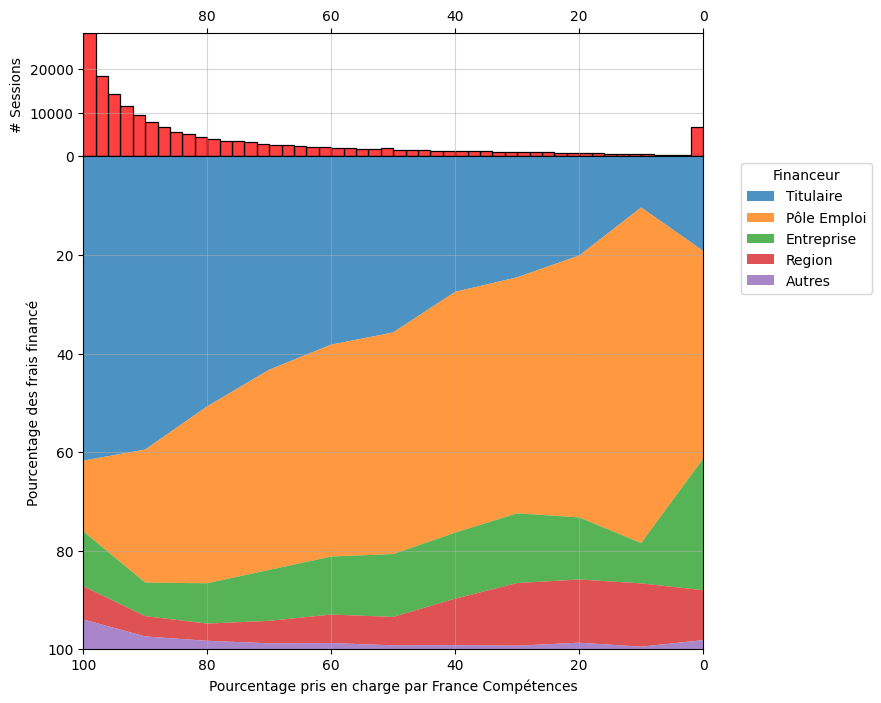

In [38]:
# Convertir les valeurs en pourcentage
df_percentage = df_cpf_fin.div(df_cpf_fin.sum(axis=1), axis=0) * 100

# Création du graphique d'aire empilée en pourcentage
fig, axs = plt.subplots(nrows=2, ncols=1, gridspec_kw={'height_ratios': [1, 4]}, figsize=(8, 8))
sns.set_palette("Set2")  # Use a professional color palette

labels_dic = {
    "part_titulaire": "Titulaire",  
    "part_pole_emploi" : "Pôle Emploi",
    "part_entreprise" : "Entreprise",
    "part_region" : "Region",
    "part_autres": "Autres"
}

# Utilisation de stackplot avec les données du DataFrame en pourcentage
axs[1].stackplot(df_percentage.index*10, 
                 df_percentage['part_titulaire'], 
                 df_percentage['part_pole_emploi'], 
                 df_percentage['part_entreprise'], 
                 df_percentage['part_region'],
                 df_percentage['part_autres'],
                 alpha=0.8)

axs[0].margins(x=0)
axs[1].margins(x=0)

axs[0].margins(y=0)
axs[1].margins(y=0)

axs[1].invert_xaxis()

# Ajout des titres et des étiquettes
#axs[0].xlabel('Decile CPF')
#axs[0].ylabel('Pourcentage')

# Ajout de la légende
#axs[0].legend()
sns.histplot(data=df_cpf_filtered, x=df_cpf_filtered[df_cpf_filtered["pourcentage_fin_fc"] <100]["pourcentage_fin_fc"], bins= 50, ax=axs[0], color= "red")

axs[1].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title='Financeur', labels = labels_dic.values())



# Inversion de l'axe y sur le premier subplot
axs[0].invert_xaxis()
axs[1].invert_yaxis()

# Déplacement de l'axe x sur le premier subplot
axs[0].xaxis.tick_top()

axs[0].grid(alpha=0.5)
axs[1].grid(alpha=0.5)

# Ajustement de l'espacement entre les subplots
plt.subplots_adjust(hspace=0)
axs[0].set_ylabel('# Sessions')

axs[1].set_xlabel('Pourcentage pris en charge par France Compétences')
axs[1].set_ylabel('Pourcentage des frais financé')

plt.savefig("Figure 1.png", bbox_inches='tight', dpi=700)
axs[0].get_yaxis().get_major_ticks()[0].label1.set_visible(False)

# Affichage du graphique
plt.show()

In [39]:
df_percentage

,part_titulaire,part_pole_emploi,part_region,part_entreprise,part_autres
decile_cpf,,,,,
0.0,19.160896,42.164432,10.124879,26.709907,1.839886
1.0,10.363082,68.098417,12.838144,8.181735,0.518622
2.0,20.109961,53.147691,12.819711,12.594907,1.327730
3.0,24.536590,47.899579,12.711182,14.135577,0.717072
4.0,27.478072,48.865136,9.443738,13.395291,0.817763
5.0,35.721530,44.970368,5.770628,12.751046,0.786428
6.0,38.199822,43.001286,5.780384,11.766161,1.252348
7.0,43.288911,40.619730,4.557147,10.334808,1.199404
8.0,50.720654,35.895348,3.492984,8.181151,1.709863


### Bubble Line Plot

C:\Users\nicol\AppData\Local\Temp\ipykernel_20864\1364947926.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[col].set_xticklabels(axs[col].get_xticklabels(), rotation=45, ha='right')
C:\Users\nicol\AppData\Local\Temp\ipykernel_20864\1364947926.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[col].set_xticklabels(axs[col].get_xticklabels(), rotation=45, ha='right')
C:\Users\nicol\AppData\Local\Temp\ipykernel_20864\1364947926.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[col].set_xticklabels(axs[col].get_xticklabels(), rotation=45, ha='right')


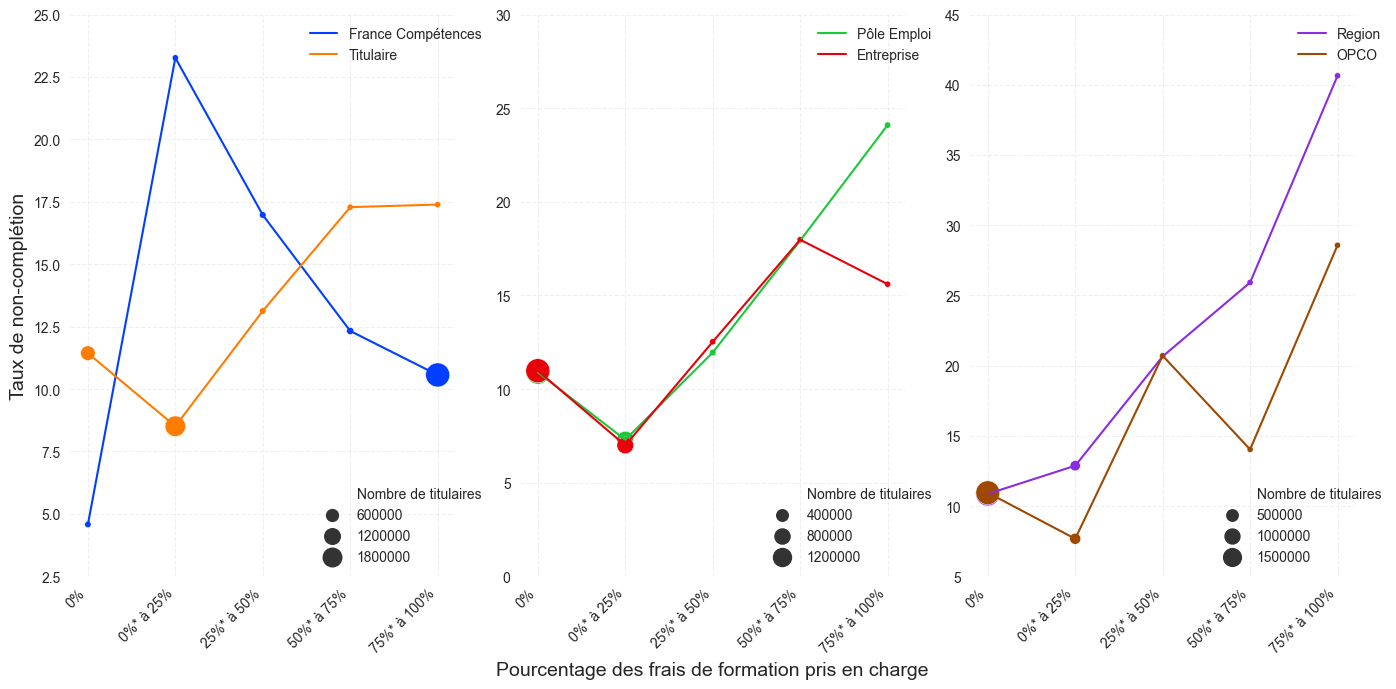

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

labels_dic = {
    "fc": "France Compétences",
    "pe": "Pôle Emploi",
    "ets": "Entreprise",
    "region": "Region",
    "opco": "OPCO",
    "tit": "Titulaire"
}

# Set a white background
sns.set_style("whitegrid")

# Set up the subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14, 7))

ncols = 3

# Define a color palette with different colors for each line
color_palette = sns.color_palette("bright", n_colors=len(labels_dic))
iteration = 0
for col in range(ncols):

    line_plot = sns.lineplot(
        x="index",
        y="pourcentage",
        data=final_melted_df[final_melted_df["col"] == col],
        hue="variable",
        palette=color_palette[iteration: iteration + 2],  # Adjusted to assign unique colors to each line
        ax=axs[col],
    )

    scatter_plot = sns.scatterplot(
        x="index",
        y="pourcentage",
        data=final_melted_df[final_melted_df["col"] == col],
        hue="variable",
        size="count",
        sizes=(20, 300),
        palette=color_palette[iteration: iteration + 2],  # Adjusted to assign unique colors to each line
        ax=axs[col],
    )

    if col == 1:
        axs[col].set_xlabel('Pourcentage des frais de formation pris en charge', fontsize=14)
        axs[col].set_ylim([0, 30])
    else: 
        axs[col].set_xlabel('', fontsize=14)
        
    axs[col].set_xticklabels(axs[col].get_xticklabels(), rotation=45, ha='right')
    if col == 0:
        axs[col].set_ylabel("Taux de non-complétion", fontsize=14)
    else:
        axs[col].set_ylabel("")


    # Set y-ticks to a maximum of 10
    y_ticks = axs[col].get_yticks()
    axs[col].set_yticks(y_ticks[::max(1, len(y_ticks) // 10)])

    # Remove x and y-axis lines
    axs[col].spines['top'].set_visible(False)
    axs[col].spines['right'].set_visible(False)
    axs[col].spines['bottom'].set_visible(False)
    axs[col].spines['left'].set_visible(False)

    # Adjust grid opacity and style
    axs[col].grid(alpha=0.3, linestyle='--')
    
    # extract the existing handles and labels
    h, l = axs[col].get_legend_handles_labels()

    # Map variable names to labels using labels_dic
    mapped_labels = [labels_dic.get(var, var) for var in l]

    # Add legend on the side of the column with mapped labels
    first_legend = axs[col].legend(h[0:2], mapped_labels[0:2], loc='upper right', bbox_to_anchor=(1.1, 1), frameon=False)
    second_legend = axs[col].legend(h[5:9], mapped_labels[5:9], loc='lower right', bbox_to_anchor=(1.1, 0), frameon=False)

    scatter_plot.legend_.texts[0].set_text('Nombre de titulaires')

    
    axs[col].add_artist(first_legend)

    iteration += 2  # Incremented by 2 to move to the next set of colors

plt.tight_layout()
plt.savefig("Figure 2.png",bbox_inches="tight")
plt.show()


### Brouillon

KeyError: 'part_france_competences'

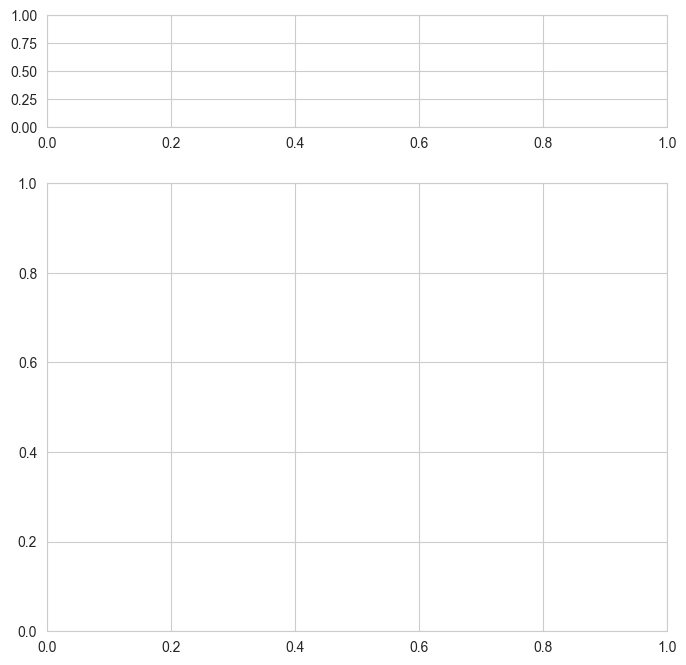

In [41]:
# Convertir les valeurs en pourcentage
df_percentage = df_cpf_fin.div(df_cpf_fin.sum(axis=1), axis=0) * 100

# Création du graphique d'aire empilée en pourcentage
fig, axs = plt.subplots(nrows=2, ncols=1, gridspec_kw={'height_ratios': [1, 4]}, figsize=(8, 8))
sns.set_palette("colorblind")  # Use a professional color palette

labels_dic = {
    "part_france_competences" : "France Compétences",
    "part_titulaire": "Titulaire",    
    "part_pole_emploi" : "Pôle Emploi",
    "part_region" : "Region",
    "part_entreprise" : "Entreprise",
    "part_autres": "Autres"
}

# Utilisation de stackplot avec les données du DataFrame en pourcentage
axs[1].stackplot(df_percentage.index*10, 
                 df_percentage[df_percentage['part_france_competences'] < 100]['part_france_competences'], 
                 df_percentage['part_titulaire'], 
                 df_percentage['part_pole_emploi'], 
                 df_percentage['part_entreprise'], 
                 df_percentage['part_region'],
                 df_percentage['part_autres'],
                 alpha=0.8)

axs[0].margins(x=0)
axs[1].margins(x=0)

axs[0].margins(y=0)
axs[1].margins(y=0)

axs[1].invert_xaxis()

# Ajout de la légende
#axs[0].legend()
sns.histplot(data=df_cpf_filtered, x=df_cpf_filtered[df_cpf_filtered["pourcentage_fin_fc"] <100]["pourcentage_fin_fc"], bins= 50, ax=axs[0], color=sns.color_palette("colorblind")[0])

axs[1].legend(bbox_to_anchor=(1.05, 1.0), labels=labels_dic.values(), loc='upper left', title='Financeur')



# Inversion de l'axe y sur le premier subplot
axs[0].invert_xaxis()
axs[1].invert_yaxis()

# Déplacement de l'axe x sur le premier subplot
axs[0].xaxis.tick_top()

axs[0].grid(alpha=0.5)
axs[1].grid(alpha=0.5)

# Ajustement de l'espacement entre les subplots
plt.subplots_adjust(hspace=0)
axs[0].set_ylabel('# Sessions')

axs[1].set_xlabel('Pourcentage Financé par France Compétences')
axs[1].set_ylabel('Pourcentage Financé par les Financeurs')

axs[0].get_yaxis().get_major_ticks()[0].label1.set_visible(False)

plt.savefig("plot.png", bbox_inches='tight', dpi=700)

# Affichage du graphique
plt.show()

In [ ]:
df_cpf_filtered["part_autres"] = df_cpf_filtered["part_etat"] + df_cpf_filtered["part_opco"] + df_cpf_filtered["part_cec"] 
df_cpf_filtered["decile_cpf"]  = df_cpf_filtered["pourcentage_fin_fc"].apply(lambda x: np.floor((x/10)) if x != 0 else 0)
part_acteur = ["part_titulaire","part_pole_emploi", "part_region","part_entreprise","part_france_competences", "part_autres"]
df_cpf_fin = df_cpf_filtered.groupby("decile_cpf")[part_acteur].agg(sum)

df_percentage = df_cpf_fin.div(df_cpf_fin.sum(axis=1), axis=0) * 100
df_percentage

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir les valeurs en pourcentage
df_percentage = df_cpf_fin.div(df_cpf_fin.sum(axis=1), axis=0) * 100

# Création du graphique d'aire empilée en pourcentage
fig, axs = plt.subplots(nrows=2, ncols=1, gridspec_kw={'height_ratios': [1, 4]}, figsize=(8, 8))
sns.set_palette("colorblind")  # Use a professional color palette

# Utilisation de stackplot avec les données du DataFrame en 
axs[1].bar(df_percentage.index*10, df_percentage['part_france_competences'], label='France Compétences', color='lightblue', width=10, alpha=0.8)
axs[1].bar(df_percentage.index*10, df_percentage['part_titulaire'], bottom=df_percentage['part_france_competences'], label='Titulaire', color='lightgreen', width=10, alpha=0.8)
axs[1].bar(df_percentage.index*10, df_percentage['part_pole_emploi'], bottom=df_percentage['part_titulaire'] + df_percentage['part_france_competences'], label='Pôle Emploi', color='lightcoral', width=10, alpha=0.8)
axs[1].bar(df_percentage.index*10, df_percentage['part_region'], bottom=df_percentage['part_pole_emploi'] + df_percentage['part_titulaire'] + df_percentage['part_france_competences'], label='Région', color='lightsalmon',width=10, alpha=0.8)
axs[1].bar(df_percentage.index*10, df_percentage['part_entreprise'], bottom=df_percentage['part_region'] + df_percentage['part_pole_emploi'] + df_percentage['part_titulaire'] + df_percentage['part_france_competences'], label='Entreprise', color=sns.color_palette("pastel")[4],width=10, alpha=0.8)
axs[1].bar(df_percentage.index*10, df_percentage['part_autres'], bottom=df_percentage['part_entreprise'] + df_percentage['part_region'] + df_percentage['part_pole_emploi'] + df_percentage['part_titulaire'] + df_percentage['part_france_competences'], label='Autres', color=sns.color_palette("pastel")[5],width=10, alpha=0.8)

axs[1].invert_xaxis()

# Ajout des titres et des étiquettes
axs[1].set_xlabel('Pourcentage Financé par France Compétences')
axs[1].set_ylabel('Pourcentage Financé par les Financeurs')

axs[0].set_ylabel('Distribution')
# Ajout de la légende
axs[1].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Utilisation de histplot avec les données du DataFrame initial
sns.histplot(data=df_cpf_filtered, x=df_cpf_filtered["pourcentage_fin_fc"], bins=11, ax=axs[0], color='lightblue')

# Inversion de l'axe y sur le premier subplot
axs[0].invert_yaxis()

# Déplacement de l'axe x sur le premier subplot
axs[0].xaxis.tick_top()

axs[0].grid(alpha=0.5)
axs[1].grid(alpha=0.5)

# Ajustement de l'espacement entre les subplots
plt.subplots_adjust(hspace=0)

plt.savefig("plot.png", bbox_inches='tight', dpi=700)

# Affichage du graphique
plt.show()


In [ ]:
# Convertir les valeurs en pourcentage
df_percentage = df_cpf_fin.div(df_cpf_fin.sum(axis=1), axis=0) * 100

# Création du graphique d'aire empilée en pourcentage
plt.figure(figsize=(10, 6))
sns.set_palette("husl")

# Utilisation de stackplot avec les données du DataFrame en pourcentage
plt.stackplot(df_percentage.index, df_percentage['part_france_competences'], df_percentage['part_titulaire'], df_percentage['part_pole_emploi'], df_percentage['part_autres'], labels=df_percentage.columns)

# Ajout des titres et des étiquettes
plt.title('Graphique d\'aire empilée par decile_cpf (en pourcentage)')
plt.xlabel('Decile CPF')
plt.ylabel('Pourcentage')

# Ajout de la légende
plt.legend()

# Affichage du graphique
plt.show()

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

fig = plt.figure()

sns.set_style("darkgrid")

g = sns.catplot(
    x="index",
    y="pourcentage",
    data=result_melted_df,
    hue="variable",
    kind="bar",
    height=4.5,
    aspect=1.5,
    col="col",
    col_wrap = 2
)

# Création du lineplot

# Get a Seaborn color palette
palette = sns.color_palette()

# Convert the palette to a list
colors = list(palette)

for col_idx in range(g.axes.shape[0]):
    # Récupérer les données de la position des patches
    bar_patches_ax = g.axes[col_idx].patches

    bar_coordinates = [(patch.get_x() + patch.get_width() / 2, patch.get_height()) for patch in bar_patches_ax if not np.isnan(patch.get_height())]
    x_coords, y_coords = zip(*bar_coordinates)
    for i in range(4):
        g.axes[col_idx].plot(x_coords[5*i:(5*i)+5], y_coords[5*i:(5*i)+5], color=colors[i], linestyle='--', label='Line Plot', alpha=0.6)


# On custom la legende ici
labels_dic = {
    "fc" : "France Compétences",
    "etat" : "Etat",
    "pe" : "Pôle Emploi",
    "region" : "Région",
    "opco" : "Opco",
    "ets" : "Entreprise",
    "cec" : "CEC",
    "tit": "Titulaire"
}

g.fig.suptitle("Taux de Réussite Partielle en Fonction de la Proportion Investie par Type de Financeur")
g.set(xlabel='Proportion investie', ylabel="Taux de Réussite Partielle")
g.set_titles("")

new_title = "Financeur"
g._legend.set_title(new_title)

for t in g._legend.texts:
    new_label = labels_dic.get(t.get_text(), t.get_text())
    t.set_text(new_label)
    
sns.move_legend(g, "upper left", bbox_to_anchor=(0.93, 1.02))
g._legend.set_frame_on(True)

# Add a note at the bottom
note_text = "* : Non Inclus"
plt.text(0.5, -0.01, note_text, ha='center', va='center', transform=g.fig.transFigure, bbox=dict(facecolor='white', alpha=0.4))

# Plot du résultat
g.savefig("graphique_echec_financement.png", dpi=500)
plt.show()